## Word Embedding

**All texts need to be converted to numbers before starts processing by
the machine. Specifically, vectors of numbers.**

Text is messy in nature and machine learning algorithms prefer well defined fixed-length inputs and outputs.

**Word Embedding** is one such technique where we can represent the text using vectors. Before deep learning era, the popular forms of word embeddings were:

- **BoW**, which stands for Bag of Words
- **TF-IDF**, which stands for Term Frequency-Inverse Document Frequency

### Bag-of-Words (BoW)

The **Bag-of-Words (BoW)**  model is a way of representing text data when modeling text with machine learning algorithms. The **Bag-of-Words (BoW)** model is popular, simple to understand, and has seen great success in **language modeling** and **document classification**.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

### Example (BoW)

Consider the following 4 sentences:-

- It was the best of times.
- it was the worst of Times.
- it is the time of stupidity.
- it is the age of foolishness.

Form this above example, let’s consider each line as a separate **“document”** and the 4 lines as our entire corpus of documents.


### Vocabulary

What would be the total vocabulary???


## Bag of Words (BoW) Model

### 1. Design the Vocabulary

The unique words by ignoring case, punctuations, and making them into root words are:

1. it
2. was
3. the
4. best
5. of
6. time
7. worst
8. stupidity
9. is
10. age
11. foolishness

**Vocabulary contains 11 words while the full corpus contains 24 words.**

### 2. Create Document Vectors

The objective is to turn each document of text into a vector so that we can use as input or output for a machine learning model.

Because we know the vocabulary has 11 words, we can use a fixed-length document representation of 11, with one position in the vector to score each word. The simplest scoring method is to mark the presence of words as a boolean value, 0 for absent, non-zero (positive value) for present. There can be other methods such as count based methods of the terms if more than one occurance of a trem.

In this example the binary vector of four documents would look as follows:

|                | it | was | the | best | of | time | worst | stupidity | is | age | foolishness |
|:--------------:|:--:|:---:|:---:|:----:|:--:|:----:|:-----:|:------:|:--:|:---:|:-----------:|
| Document #1 [ It was the best of times. ] |  1 |  1  |  1  |   1  |  1 |   1  |   0   |    0   |  0 |  0  |      0      |
| Document #2 [ it was the worst of Times. ] |  1 |  1  |  1  |   0  |  1 |   1  |   1   |    0   |  0 |  0  |      0      |
| Document #3 [ it is the time of stupidity. ] |  1 |  0  |  1  |   0  |  1 |   1  |   0   |    1   |  1 |  0  |      0      |
| Document #4 [ it is the age of foolishness. ] |  1 |  0  |  1  |   0  |  1 |   0  |   0   |    0   |  1 |  1  |      1      |

### Problems

- Ordering of words have been discarded which **ignores the context**. These unordered words **can't preserve document semantics** For instance, **“this is interesting”** vs **“is this interesting”**. Moreover, **"stupidity"** and **"foolishness"** are considered two different words in the dictionary.
- We are retaining no information on the **grammar of the sentences**.
- New documents that overlap with the vocabulary of known words, but may contain **words outside of the vocabulary**.
- If the vocabulary size increases the **document representation dimension** also increases.

## Managing Vocabulary

In the previous example, the **length of the document vector** is equal to the number of known words which is 11 words.

For a very large corpus, such as thousands of books, the length of the vector **might be thousands or millions of positions**. Further, each document may contain **very few of the known words in the vocabulary**. This results in a vector with lots of zero scores, called a sparse vector or sparse representation. Sparse vectors require more memory and computational resources **(space and time complexity)**

It's very important to decrease the size of the vocabulary when using a bag-of-words model.

### Solution #1

There are simple text cleaning techniques that can be used as a first step, such as:

- Ignoring case
- Ignoring punctuation
- Ignoring frequent words that don’t contain much information, called stop words, like “a,” “of,” etc.
- Fixing misspelled words.
- Reducing words to their stem (e.g. “play” from “playing”) using stemming algorithms.

### Solution #2

Each word or token is called a “gram”. Creating a vocabulary of two-word pairs is, in turn, called a **bigram model**.

An **N-gram** is an N-token sequence of words: a 2-gram (more commonly called a bigram) is a two-word sequence of words like “please turn”, “turn your”, or “your homework”, and a **3-gram (more commonly called a trigram)** is a three-word sequence of words like “please turn your”, or “turn your homework”.

For example, the bigrams in the first line of text in the previous section: **“It was the best of times”** are as follows:

- “it was”
- “was the”
- “the best”
- “best of”
- “of times”

**A vocabulary then tracks triplets of words is called a trigram model** and the general approach is called the **n-gram model**, where n refers to the number of grouped words.

**Note: Often a simple bigram approach is better than a 1-gram bag-of-words model.**



## One-Hot Representation

The one­ hot representation, as the name suggests, starts with a zero vector, and sets as 1 the corresponding entry in the vector if the word is present in the sentence or document.

Tokenizing the sentences, ignoring punctuation, and treating everything as lowercase, will yield a vocabulary of size 8: `{time, fruit, flies, like, a, an, arrow, banana}`.

The binary encoding for **“like a banana”** would then be:

```
[0, 0, 0, 1, 1, 0, 0, 1]
```



[[1 1 0 1 0 1 1]
 [0 0 1 1 1 1 0]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

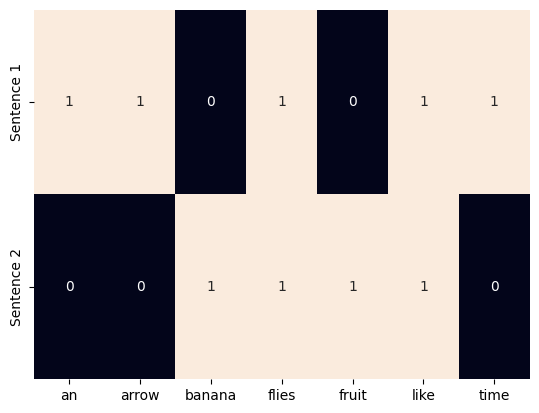

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()

print (one_hot)

print (one_hot_vectorizer.vocabulary_)

dictionary = sorted(one_hot_vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=dictionary,
                                             yticklabels=['Sentence 1','Sentence 2'])

\

### **Term Frequency (TF)**
Term Frequent (**TF**) is a measure of how frequently a term, $t$, appears in a document, $d$:

\

$$TF_{t,d} = \frac{n_{t,d}}{\text{Total number of terms in document}\ d }$$

\

$n_{t,d}$ = Number of times term $t$ appears in a document $d$. Thus, each document and term would have its own **TF** value.

Consider these 3 documents like **BoW** model:-

- It was the best of the time.
- it was the worst of Times.
- it is the time of stupidity.

The vocabulary or dictionary of the entire corpus would be:-

1. it
2. was
3. the
4. best
5. of
6. time
7. worst
8. is
9. stupidity

Now we will calculate the **TF** values for the **Document 3**.

Document 3 :- **it is the time of stupidity.**

- Number of words in Document 3 = **6**
- TF for the word **‘the’** = (number of times **‘the’** appears in Document 3) / (number of terms in Document 3) = **1/6**

Likewise:-

- TF(**'it'**) = 1/6
- TF(**'was'**) = 0/6 = 0
- TF(**'the'**) = 1/6
- TF(**'best'**) = 0/6 = 0
- TF(**'of'**) = 1/6
- TF(**'time'**) = 1/6
- TF(**'worst'**) = 0/6 = 0
- TF(**'is'**) = 1/6
- TF(**'stupidity'**) = 1/6

We can calculate all the term frequencies for all the terms of all the documents in this manner:-

|    Term   | Document#1 | Document#2 | Document#3 | TF (Document#1) | TF (Document#2) | TF (Document#3) |
|:---------:|:----------:|:----------:|:----------:|:---------------:|:---------------:|:---------------:|
|     it    |      1     |      1     |      1     |       1/7       |       1/6       |       1/6       |
|    was    |      1     |      1     |      0     |       1/7       |       1/6       |        0        |
|    the    |      2     |      1     |      1     |       2/7       |       1/6       |       1/6       |
|    best   |      1     |      0     |      0     |       1/7       |        0        |        0        |
|     of    |      1     |      1     |      1     |       1/7       |       1/6       |       1/6       |
|    time   |      1     |      1     |      1     |       1/7       |       1/6       |       1/6       |
|   worst   |      0     |      1     |      0     |        0        |       1/6       |        0        |
|    is     |      0     |      0     |      1     |        0        |        0        |       1/6       |
| stupidity |      0     |      0     |      1     |        0        |        0        |       1/6       |






In [ ]:
import math

print(math.log((3),10))

print(math.log((1),10))
print(math.log((2),10))

print(math.log((3/3),10))

print(math.log((4/3),10))

print(math.log((4/5),10))

0.47712125471966244
0.0
0.30102999566398114
0.0
0.1249387366082999
-0.09691001300805638


\

### **Inverse Document Frequency (IDF)**

IDF is a measure of how important a term is. We need the IDF value because computing just the **TF alone is not sufficient** to understand the importance of words:

\

$$IDF_{t} = log \ (\frac{\text{Total Number of Documents}}{\text{The Number of Documents with Term $t$}})$$

\

A problem with scoring word frequency is that highly frequent words **(‘is’, ‘the’, ‘a’ etc)** start to dominate in the document (e.g. larger score), but may not contain as much **“useful information”** to the model comapre to the rarer but **domain specific words**.


One approach is to rescale the frequency of words by **how often they appear in all documents**, so that the scores for frequent words like “the” that are also frequent **across all documents are penalized**.

This approach to scoring is called Term Frequency – Inverse Document Frequency, or TF-IDF for short, where:

- **Term Frequency:** is a scoring of the frequency of the word in the current document.
- **Inverse Document Frequency:** is a scoring of how rare the word is across documents.

**Thus the idf of a rare term is high, whereas the idf of a frequent term is likely to be low.**

We can calculate the IDF values for **Document 3**:

Document 3 :- **it is the time of stupidity.**

IDF(‘it’) =  log(total number of documents/number of documents containing the word ‘it’) = log(3/3) = log(1) = 0

We can calculate the IDF values for each word like this. Thus, the IDF values for the entire vocabulary would be:

|    Term   | Document#1 | Document#2 | Document#3 |  IDF |
|:---------:|:----------:|:----------:|:----------:|:----:|
|     it    |      1     |      1     |      1     | 0.00 |
|    was    |      1     |      1     |      0     | 0.18 |
|    the    |      2     |      1     |      1     | 0.00 |
|    best   |      1     |      0     |      0     | 0.48 |
|     of    |      1     |      1     |      1     | 0.00 |
|    time   |      1     |      1     |      1     | 0.00 |
|   worst   |      0     |      1     |      0     | 0.48 |
|    is     |      0     |      0     |      1     | 0.48 |
| stupidity |      0     |      0     |      1     | 0.48 |

\

We can now compute the TF-IDF score for each word in the corpus. Words with a higher score are more important, and those with a lower score are less important:

$$(TF-IDF)_{t,d} = TF_{t,d} * IDF_{t}$$


You can find the overall summary in the following figure.

<div align="center">
<img src="https://drive.google.com/uc?id=1Xw5RlK_RxYtZEQtpFNaePXnJNyQmLcn1" width="680" height="230">
</div>



We can now calculate the TF-IDF score for every word in **Document 3**:

Document 3 :- **it is the time of stupidity.**

TF-IDF(‘it’, Document 3) = TF(‘it’, Document 3) * IDF(‘it’) = 1/6 * 0 = 0

Likewise:-

- TF(**'it'**) = (1/6) * 0 = 0
- TF(**'is'**) = (1/6) * 0.48
- TF(**'the'**) = (1/6) * 0 = 0
- TF(**'best'**) = (0/6) * 0.48 = 0
- TF(**'time'**) = (1/6) * 0 = 0
- TF(**'of'**) = (1/6) * 0 = 0
- TF(**'stupidity'**) = (1/6) * 0.48

Similarly, we can calculate the TF-IDF scores for all the words with respect to all the documents.

- First, notice how if there is a very common
word that occurs in all documents (i.e., n = N), IDF(w) is 0 and the TF­IDF score is 0, thereby
completely penalizing that term.
- Second, if a term occurs very rarely, perhaps in only one document,
the IDF will be the maximum possible value, log N


[[0.46977774 0.         0.66850146 0.         0.33425073 0.46977774]
 [0.         0.57615236 0.40993715 0.57615236 0.40993715 0.        ]]
{'time': 5, 'flies': 2, 'like': 4, 'arrow': 0, 'fruit': 3, 'banana': 1}
['arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

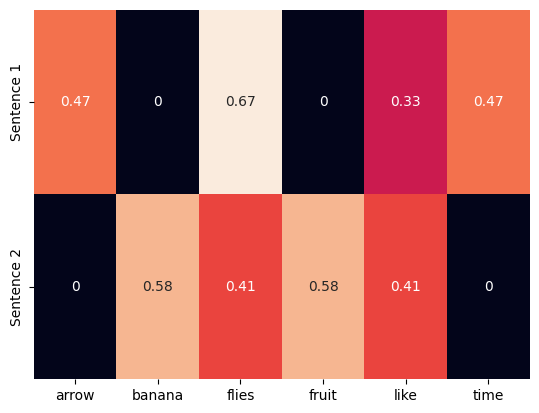

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

corpus = ['The Time flies flies like an arrow.',
          'Fruit flies like a banana.']

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

print (tfidf)

print (tfidf_vectorizer.vocabulary_)

dictionary = sorted(tfidf_vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

### Summary

Bag of Words just creates a set of vectors containing the count of word occurrences in the document, while the TF-IDF model contains information on the more important words and the less important ones as well.

**Bag of Words vectors are easy to interpret. However, TF-IDF usually performs better in machine learning models.**

Understanding the context of words is important. Detecting the similarity between the words ‘time’ and ‘age’, or 'stupidity' and 'foolishness'.

This is where Word Embedding techniques such as **Word2Vec, Continuous Bag of Words (CBOW), Skipgram**, etc come into play.

## Bag-of-Words Text Classification

We will show how to build a simple Bag of Words (BoW) text classifier using PyTorch. The classifier is trained on IMDB movie reviews dataset.

In [ ]:
from pathlib import Path

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
# from google_drive_downloader import GoogleDriveDownloader as gdd
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
# DATA_PATH = '/content/imdb.csv'
# if not Path(DATA_PATH).is_file():
#     gdd.download_file_from_google_drive(
#         file_id='1EWReHFoPXK2Z-zdELR_LC6J6VRgp-QgN',
#         dest_path=DATA_PATH,
#     )

In [ ]:
!pip install gdown
# https://drive.google.com/file/d/1C0W_eOl5dpArbh2ntKtCIYN50E7VDoe5/view?usp=sharing

!gdown 1C0W_eOl5dpArbh2ntKtCIYN50E7VDoe5

In [ ]:
# Upload imdb.csv file in colab
DATA_PATH = '/content/imdb.csv'

import pandas as pd
df=pd.read_csv(DATA_PATH)
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
import numpy as np
x=np.array(pd)
print(x)

<module 'pandas' from '/usr/local/lib/python3.11/dist-packages/pandas/__init__.py'>


## Bag-of-Words Sentiment Classification

<div align="center">
<img src="https://drive.google.com/uc?id=1DpUpmKZGNAtoY7FH7PNKbZK-0FukGuuM" width="390" height="360">
</div>

So the final bag-of-words vector for `['the', 'gray', 'cat', 'sat', 'on', 'the', 'gray', 'mat']` is `[0, 1, 1, 2, 2, 1, 0, 1]`

In [ ]:
class Sequences(Dataset):
    def __init__(self, data):
        self.vectorizer = CountVectorizer(stop_words='english')
        self.sequences = self.vectorizer.fit_transform(data.review.tolist())
        self.labels = data.sentiment.tolist()
        self.token2idx = self.vectorizer.vocabulary_
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}

    def __getitem__(self, i):
        return self.sequences[i, :].toarray(), self.labels[i]

    def __len__(self):
        return self.sequences.shape[0]

In [ ]:
df = pd.read_csv(DATA_PATH)

print((df))
codes=[0,1]
df.columns = ["review", "sentiment"]
df["sentiment"] = df["sentiment"].astype('category')
df["sentiment"] = df["sentiment"].cat.codes

df_train = df.head(900)
df_test = df.tail(100)
print(df_train)


dataset = Sequences(df_train)
train_loader = DataLoader(dataset, batch_size=900)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]
                                                review  sentiment
0    One of the other reviewers has mentioned that ...          1
1    A wonderful little production. <b

In [ ]:
class BagOfWordsClassifier(nn.Module):
    def __init__(self, vocab_size, hidden1, hidden2):
        super().__init__()
        ### 1st hidden layer: vocab_size --> 128
        self.linear_1 = nn.Linear(vocab_size, hidden1)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 128 --> 64
        self.linear_2 = nn.Linear(hidden1, hidden2)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### Output layer: 64 --> 1
        self.linear_out = nn.Linear(hidden2, 1)

    def forward(self, inputs):
        ### 1st hidden layer
        out = self.linear_1(inputs.squeeze(1).float())
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)

        ### 2nd hidden layer
        out = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        # Linear layer (output)
        logits  = self.linear_out(out)

        return logits

In [ ]:
model = BagOfWordsClassifier(len(dataset.token2idx), 128, 64)
model

BagOfWordsClassifier(
  (linear_1): Linear(in_features=16683, out_features=128, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=128, out_features=64, bias=True)
  (relu_2): ReLU()
  (linear_out): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:

train_losses = []

for epoch in range(150):
    losses = []
    total = 0
    for inputs, target in train_loader:
        model.zero_grad()
        #print(target)
        output = model(inputs)
        loss = criterion(output.squeeze(), target.float())

        loss.backward()

        optimizer.step()

        losses.append(loss.item())
        total += 1

    epoch_loss = sum(losses) / total
    train_losses.append(epoch_loss)

    print(f'Epoch #{epoch + 1}\tTrain Loss: {epoch_loss:.3f}')

Epoch #1	Train Loss: 0.693
Epoch #2	Train Loss: 0.675
Epoch #3	Train Loss: 0.650
Epoch #4	Train Loss: 0.618
Epoch #5	Train Loss: 0.580
Epoch #6	Train Loss: 0.538
Epoch #7	Train Loss: 0.493
Epoch #8	Train Loss: 0.447
Epoch #9	Train Loss: 0.401
Epoch #10	Train Loss: 0.356
Epoch #11	Train Loss: 0.312
Epoch #12	Train Loss: 0.270
Epoch #13	Train Loss: 0.231
Epoch #14	Train Loss: 0.196
Epoch #15	Train Loss: 0.165
Epoch #16	Train Loss: 0.137
Epoch #17	Train Loss: 0.113
Epoch #18	Train Loss: 0.093
Epoch #19	Train Loss: 0.076
Epoch #20	Train Loss: 0.062
Epoch #21	Train Loss: 0.051
Epoch #22	Train Loss: 0.041
Epoch #23	Train Loss: 0.034
Epoch #24	Train Loss: 0.028
Epoch #25	Train Loss: 0.023
Epoch #26	Train Loss: 0.019
Epoch #27	Train Loss: 0.016
Epoch #28	Train Loss: 0.013
Epoch #29	Train Loss: 0.011
Epoch #30	Train Loss: 0.009
Epoch #31	Train Loss: 0.008
Epoch #32	Train Loss: 0.007
Epoch #33	Train Loss: 0.006
Epoch #34	Train Loss: 0.005
Epoch #35	Train Loss: 0.005
Epoch #36	Train Loss: 0.004
E

In [ ]:
def predict_sentiment(text):
  test_vector = torch.LongTensor(dataset.vectorizer.transform([text]).toarray())

  output = model(test_vector)

  prediction = torch.sigmoid(output).item()

  if prediction > 0.5:
    print(f'{prediction:0.3}: Positive sentiment')
    return 1
  else:
    print(f'{prediction:0.3}: Negative sentiment')
    return 0

In [ ]:
test_text = "The story itself is just predictable and lazy."
predict_sentiment(test_text)

0.357: Negative sentiment


0

In [ ]:
test_text = "Excellent cast, story line, performances."
predict_sentiment(test_text)

0.786: Positive sentiment


1

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
pred_labels = []

sentences = list(df_test['review'])
labels = df_test['sentiment']

print(sentences)

for sentence in sentences:
  pred_labels.append(predict_sentiment(sentence))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred_labels)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(labels, pred_labels)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(labels, pred_labels)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred_labels)
print('F1 score: %f' % f1)

# confusion matrix
matrix = confusion_matrix(labels, pred_labels)
print(matrix)

["I had few problems with this film, and I have heard a lot of criticisms saying it is overlong and overrated. True, it is over three hours long, but I was amazed that it goes by so quickly. I don't think it is overrated at all, I think the IMDb rating is perfectly decent. The film looks sumptuous, with gorgeous costumes and excellent effects, and the direction from James Cameron rarely slips from focus. Leonardo DiCaprio gives one of his best performances as Jack, and Kate Winslet is lovely as Rose. David Warner, a great actor, steals every scene he's in. The story is very rich in detail, and is hot on character development, obvious with the love story which is very moving when it needs to be, though in the first bit of the movie it is a little slow. The last hour is extremely riveting, and I will confess that I was on the edge of my seat, when the Titanic sank. I will also say that the last five minutes were very moving. The music score by James Horner was lovely, though I never was 